# Category theory for quantum                       natural language processing

Alexis TOUMI

June 24th 2022

**Outline:**

1. Background: DisCoCat
2. QNLP: theory and experiments
3. DisCoPy for the quantum computer scientist


## 1. Background: DisCoCat

DisCoCat stands for:

- categorical
- compositional
- distributional

models of meaning.

In short we use **category theory** to build natural language processing (NLP) models that combine **compositionality** and the **distributional hypothesis**.

### 1.A. Compositionality

> *The meaning of a sentence is given by the meaning of the words and the rules used to combine them.*

~Frege~ Boole, *An investigation of the laws of thought* (1854)


> *There is in my opinion no important theoretical difference between natural languages and the artificial languages of logicians*.

Montague, *Universal Grammar* (1970)

![Montague](https://danielmichaelcicala.github.io/act2019/assets/dialogue-challenge/3-thesis-loves-a-mortal.png)

The recipe for **good-old fashioned AI** (GOFAI) and **expert systems**:

1. formalise natural language as a (probabilistic) **grammar**,
2. translate questions into queries for a ~database~ **knowledge base**,
3. win Jeopardy!

| IBM-Georgetown (1954) | Watson wins Jeopardy! (2011) |
| -----|------|
| ![IBM-Georgetown experiment](https://content.teldap.tw/index/files/image/%E7%A7%91%E6%8A%80%E5%A7%8B%E6%96%BC%E4%BA%BA%E6%80%A7%EF%BC%8DThe%20Georgetown-IBM%20experiment%20in%20January%201954%204.jpg) | ![IBM Watson wins Jeopardy!](https://cdn.unitycms.io/images/BEeyVRhzKeHARy16fyUWab.jpg) |

Some issues with this **symbolic approach**:

- grammars are brittle and suffer from ambiguity,
- knowledge bases are expensive and unreliable,
- even simple queries quickly become intractable.

### 1.B. Distributionality

> *You shall know a word by the company it keeps.*

Firth, *A synopsis of linguistic theory, 1930-1955*

A simple recipe:

1. collect $M$ documents with $N$ words to get a $M \times N$ matrix,
2. scale it (e.g. tf-idf), factorise it (e.g. SVD) to get a vector $w \in \mathbb{R}^d$ for each word,
3. inner product $\langle w'\vert w \rangle$ computes word similarity!

Some issues with these naïve **vector space models**:

- no compositionality: a sentence is a **bag of words**,
- no contextuality: the same vector for different meanings,
- sparsity: we can try *n-grams* (i.e. $n$-tuples) but almost all zero.

These issues were overcome by **deep neural networks** and **large language models**.

| Attention mechanism | Clickbait mechanism |
| ------------------- | ------------------- |
| ![Transformer architecture](https://imgs.search.brave.com/9siRrM0u4OXw2mkcKMVLcVLgTQGGysSRy9-nd00Wtww/rs:fit:626:575:1/g:ce/aHR0cHM6Ly9taXJv/Lm1lZGl1bS5jb20v/bWF4LzEyNTIvMSpK/dUdaYVpjUnRtcnRD/RVBZOHFmc1V3LnBu/Zw) | ![GPT-3 The Guardian](https://data.junkee.com/wp-content/uploads/2020/09/irobot_featured1.jpg) |

Indeed, **why** should we be scared?

Because we don't understand **how** these models work: LLM lack **explainability**, they are **black boxes** with billions of parameters.

No justice, no peace.

No explainability, no **fairness**.

### 1.C. DisCoCat models

![She who hates Bob](https://www.capestart.com/wp-content/uploads/2020/10/1_t-lNNKh6w84RZnMsG_DePw.png)

[A Compositional Distributional Model of Meaning](http://www.cs.ox.ac.uk/people/stephen.clark/papers/qai08.pdf)

Clark, Coecke & Sadrzadeh (2008)

| Linguistics | Quantum | Algebra |
| --- | ------- | -------------- |
| grammatical type | system | vector space |
| meaning | state | vector |
| parsing | process | linear map |
| grammar | entanglement | tensor product |

> *Every sufficiently good analogy is yearning to become a functor.*

Baez, _Quantum Quandaries: A Category-Theoretic Perspective_ (2006)

**Definition:** A DisCoCat model is a **monoidal functor** $F : \mathbf{G} \to \mathbf{Vect}$
* from a category $G$ of grammatical types and parsing,
* to the category $\mathbf{Vect}$ of vector spaces and linear maps.

These models have received some experimental validation, but they can be **exponentially hard to evaluate** (because of the #P-hardness of _tensor contraction_).

Bob's joke 10 years ago: **let's just use a quantum computer!**

## 2. QNLP: theory and experiments

![QNLP](https://miro.medium.com/max/1400/1*Knq7_KmyRSoY8CHOXsvWUA.png)

**Definition:** A QNLP model is a monoidal functor $F : \mathbf{G} \to \mathbf{Circ}$
* from a category $G$ of grammatical types and parsing,
* to the category $\mathbf{Circ}$ of qubits and quantum circuits.

In practice, we use a **variational approach** where:
* each word is sent to a parameterised **ansatz**,
* parsing gets mapped to circuit architecture,
* classical optimisation (e.g. SPSA) finds optimal parameters.

![variational QNLP](https://miro.medium.com/max/1400/1*4QSIChBN5fSFMezlYmn5lw.jpeg)

In theory, if the ansätze are exponentially hard to simulate by a classical computer, we could get **quantum advantage for NLP**.
We can also use Grover algorithm to get a (more realistic) **quadratic speedup**.

Zeng & Coecke, [Quantum Algorithms for Compositional Natural Language Processing](http://arxiv.org/abs/1608.01406) (2016)

Our first experiments focused on ~classification~ **question answering**. This is being extended to:
* language generation,
* automatic translation,
* music generation,
* drawing generation (coming soon!)

### 3. DisCoPy for the quantum computer scientist

**Definition:** A monoidal signature is a tuple $\Sigma = (\Sigma_0, \Sigma_1, \text{dom}, \text{cod})$ where:
* $\Sigma_0$ is a set of **wires**,
* $\Sigma_1$ is a set of **boxes**,
* $\text{dom}, \text{cod} : \Sigma_1 \to \Sigma_0^\star$ are the **input** and **output** wires for each box.

**Definition:** A layer is a triple $L(\Sigma) = \Sigma_0^\star \times \Sigma_1 \times \Sigma_0^\star$.

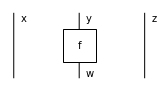

In [1]:
from discopy import Ty, Box, Id

x, y, z, w = map(Ty, "xyzw")
f = Box(name='f', dom=y, cod=w)
layer = Id(x) @ f @ Id(z)

layer.draw(aspect='equal', figsize=(2, 2))

**Definition:** A diagram $d$ is given by:
* a domain $\text{dom}(d) \in \Sigma_0^\star$,
* a list of **composable** layers $\text{layers}(d) = d_1, \dots, d_n \in \Sigma_1^\star$ such that
    - $\text{dom}(d) = \text{dom}(d_0)$ and
    - $\text{dom}(d_{i + 1}) = \text{cod}(d_i)$ for $i \leq n$.
    
We can compose diagrams:
* in sequence with `>>`,
* and in parallel with `@`.

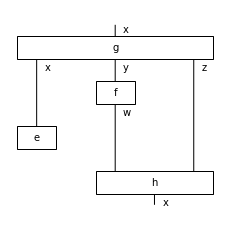

In [2]:
g, h = Box('g', x, x @ y @ z), Box('h', w @ z, x)
e = Box('e', x, Ty())

diagram = g >> layer >> e @ h

diagram.draw(figsize=(3, 3))

Sometimes two diagrams represent the same process.

DisCoPy performs **diagram rewriting** which can be used to:
* check equality of two diagrams,
* find the optimal diagram for a given process.

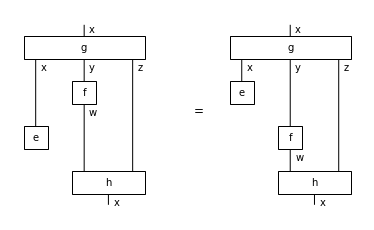

In [3]:
from discopy import drawing

drawing.equation(
    diagram, diagram.normal_form(),                                figsize=(5, 3))

We can add special kinds of boxes for:
* swaps,
* cups and caps,
* spiders,
* ...

which all come with new kinds of rewrites.

We can now draw any parsing as a diagram!

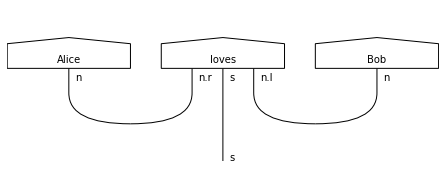

In [9]:
from discopy import pregroup, Word, Cup, Cap

s, n = Ty('s'), Ty('n')
Alice, Bob = Word('Alice', n), Word('Bob', n)
loves = Word('loves', n.r @ s @ n.l)

sentence = Alice @ loves @ Bob >> Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
pregroup.draw(sentence)

In [10]:
from discopy import TensorFunctor

F = TensorFunctor(
    ob={s: 1, n: 2},
    ar={Alice: [1, 0],
        loves: [[0, 1],
                [1, 0]],
        Bob:   [0, 1]})

assert F(sentence)

We can represent any kind of quantum process in terms of diagrams.

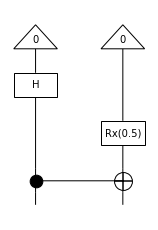

In [15]:
from discopy.quantum import CX, H, Rx, Ket, sqrt

circuit = Ket(0, 0) >> H @ Rx(0.5) >> CX
circuit.draw(figsize=(2, 3))

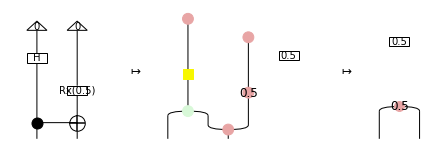

In [16]:
from discopy.quantum.zx import circuit2zx, X, scalar

drawing.equation(
    circuit, circuit2zx(circuit), scalar(0.5) @ X(0, 2, .5), figsize=(6, 2), symbol='$\mapsto$')

Now we can define functors from grammar to circuit, i.e. QNLP models!

Circuit for 'Alice loves Bob':


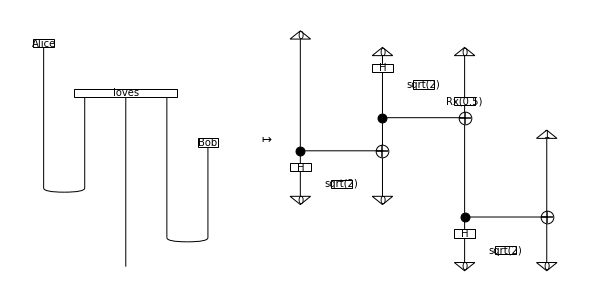

In [17]:
from discopy import CircuitFunctor, qubit

def verb_ansatz(phase):
    return Ket(0, 0) >> H @ sqrt(2) @ Rx(phase) >> CX

ob = {s: 0, n: 1}
ar = lambda params: {
    Alice: Ket(0), Bob: Ket(1),
    loves: verb_ansatz(params['loves'])}

F = lambda params: CircuitFunctor(ob, ar(params))

params = {'loves': 0.5}

print("Circuit for 'Alice loves Bob':")
drawing.equation(
    sentence, F(params)(sentence), symbol='$\mapsto$',
    aspect='auto', draw_type_labels=False, figsize=(8, 4))

Different ways of evaluating functors:

* executing them on quantum devices with:
    - t$\vert$ket$\rangle$,
    - pennylane (WIP)
* high-performance classical simulation with
    - JAX,
    - pytorch,
    - tensorflow,
    - tensornetwork,
    - etc.
    
... and we keep on adding tools to the toolbox!

* classical-quantum processes (all of the dodo book in Python),
* from qubits to arbitrary-dimensional qudits,
* diagrammatic differentiation of diagrams with symbolic parameters,
* quantum linear optical computing (coming soon!)